<a href="https://colab.research.google.com/github/skywalker0803r/c620/blob/main/notebook/linear_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install autorch >log.txt

In [37]:
import pandas as pd
import joblib
import autorch
from torch import nn#
from torch.optim import Adam
max_epochs = 15

# c620 模擬數據

  0%|          | 0/15 [00:00<?, ?it/s]

dict_keys(['x41', 'case', 'yRefluxRate', 'yControl', 'yHeatDuty', 'vent_gas_x', 'distillate_x', 'sidedraw_x', 'bottoms_x', 'vent_gas_sf', 'distillate_sf', 'sidedraw_sf', 'bottoms_sf', 'density'])


  7%|▋         | 1/15 [00:00<00:03,  4.55it/s]

epoch:0 train_loss:2.5403 valid_loss:2.2044


100%|██████████| 15/15 [00:03<00:00,  4.68it/s]


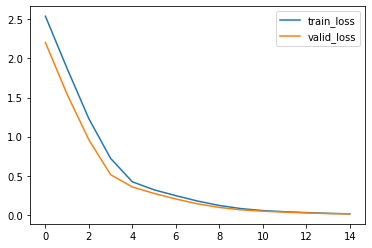

In [38]:
# load data
c620_df = pd.read_csv('/content/drive/MyDrive/台塑輕油案子/data/c620/cleaned/c620_train.csv',index_col=0)
c620_df_real = pd.read_excel('/content/drive/MyDrive/台塑輕油案子/data/c620/明志_遷移式學習_訓練資料_寄送版/c620_data.xlsx',index_col=0)
c = joblib.load('/content/drive/MyDrive/台塑輕油案子/data/c620/col_names/c620_col_names.pkl')
print(c.keys())
# def col
x_col = c['case']+c['x41']
op_col = c['density']+c['yRefluxRate']+c['yHeatDuty']+c['yControl']
op_col = c620_df_real[op_col].dropna(axis=1).columns.tolist()
sp_col = c['vent_gas_sf']+c['distillate_sf']+c['sidedraw_sf']+c['bottoms_sf']
n_idx = [[i,i+41,i+41*2,i+41*3] for i in range(41)]

# modeling
c620_model = autorch.utils.PartBulider(c620_df,x_col,sp_col+op_col,limit_y_range=False,normalize_idx_list=n_idx,max_epochs=max_epochs)
c620_model.net = nn.Linear(len(x_col),len(sp_col)+len(op_col))
c620_model.optimizer = Adam(c620_model.net.parameters(),lr=0.01)
c620_model.train()

In [39]:
# test
c620_model.test(e=0.02)

,R2,MSE,MAPE
Tatoray Stripper C620 Split Factors Calculation_Split Factor for Individual Component to Tatoray Stripper C620 Vent Gas_Hydrogen_Fraction,0,2.40393e-07,0.0338388
Tatoray Stripper C620 Split Factors Calculation_Split Factor for Individual Component to Tatoray Stripper C620 Vent Gas_Methane_Fraction,0,0.000101141,0.95556
Tatoray Stripper C620 Split Factors Calculation_Split Factor for Individual Component to Tatoray Stripper C620 Vent Gas_Ethane_Fraction,0.897862,5.37775e-05,0.661648
Tatoray Stripper C620 Split Factors Calculation_Split Factor for Individual Component to Tatoray Stripper C620 Vent Gas_Propane_Fraction,0.970728,0.000113633,0.800512
Tatoray Stripper C620 Split Factors Calculation_Split Factor for Individual Component to Tatoray Stripper C620 Vent Gas_n-Butane_Fraction,0.91334,0.00153144,3.9505
...,...,...,...
Density_Bottoms Production Rate and Composition,0.995471,7.60661e-11,0.000848523
Tatoray Stripper C620 Operation_Yield Summary_Reflux Rate_m3/hr,0.965522,4.52276,0.909018
Tatoray Stripper C620 Operation_Column Temp Profile_C620 Tray 14 (Control)_oC,0,8.86457,0.520888
Tatoray Stripper C620 Operation_Column Temp Profile_C620 Tray 34 (Control)_oC,0,10.5596,0.53028


# c620遷移學習

In [40]:
# use pretrain net continue training
from copy import deepcopy
pretrain_net = deepcopy(c620_model.net.train())
print(pretrain_net)

Linear(in_features=44, out_features=172, bias=True)


In [41]:
c620_model = autorch.utils.PartBulider(c620_df_real,x_col,sp_col+op_col,limit_y_range=False,normalize_idx_list=n_idx,max_epochs=max_epochs) # use real data  
c620_model.net = pretrain_net # use pretrain net
c620_model.optimizer = Adam(c620_model.net.parameters())

100%|██████████| 15/15 [00:00<00:00, 279.57it/s]


epoch:0 train_loss:0.2724 valid_loss:0.2732


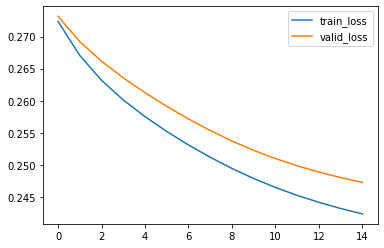

In [42]:
c620_model.train()

In [43]:
# test
c620_model.test(e=0.02)

,R2,MSE,MAPE
Tatoray Stripper C620 Split Factors Calculation_Split Factor for Individual Component to Tatoray Stripper C620 Vent Gas_Hydrogen_Fraction,0,0.0029986,4.41757
Tatoray Stripper C620 Split Factors Calculation_Split Factor for Individual Component to Tatoray Stripper C620 Vent Gas_Methane_Fraction,0,0.011892,10.2216
Tatoray Stripper C620 Split Factors Calculation_Split Factor for Individual Component to Tatoray Stripper C620 Vent Gas_Ethane_Fraction,0,0.18453,42.7892
Tatoray Stripper C620 Split Factors Calculation_Split Factor for Individual Component to Tatoray Stripper C620 Vent Gas_Propane_Fraction,0,0.220218,45.648
Tatoray Stripper C620 Split Factors Calculation_Split Factor for Individual Component to Tatoray Stripper C620 Vent Gas_n-Butane_Fraction,0,0.227368,45.6671
...,...,...,...
Density_Bottoms Production Rate and Composition,0,0.011691,9.76882
Tatoray Stripper C620 Operation_Yield Summary_Reflux Rate_m3/hr,0,619.47,18.8225
Tatoray Stripper C620 Operation_Column Temp Profile_C620 Tray 14 (Control)_oC,0,684.05,11.3337
Tatoray Stripper C620 Operation_Column Temp Profile_C620 Tray 34 (Control)_oC,0,886.225,10.6231


In [44]:
# save
joblib.dump(c620_model,'/content/drive/MyDrive/台塑輕油案子/data/c620/model/c620_real_data.pkl')

['/content/drive/MyDrive/台塑輕油案子/data/c620/model/c620_real_data.pkl']

# c660 模擬數據

  7%|▋         | 1/15 [00:00<00:02,  4.72it/s]

epoch:0 train_loss:1.8194 valid_loss:1.7700


100%|██████████| 15/15 [00:03<00:00,  4.67it/s]


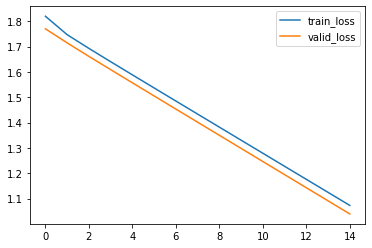

In [46]:
# load data
c660_df = pd.read_csv('/content/drive/MyDrive/台塑輕油案子/data/c620/cleaned/c660_train.csv',index_col=0)
c660_df_real = pd.read_excel('/content/drive/MyDrive/台塑輕油案子/data/c620/明志_遷移式學習_訓練資料_寄送版/c660_data.xlsx',index_col=0)
c = joblib.load('/content/drive/MyDrive/台塑輕油案子/data/c620/col_names/c660_col_names.pkl')

# def col
x_col = c['case']+c['x41']
op_col = c['density']+c['yRefluxRate']+c['yHeatDuty']+c['yControl']
op_col = c660_df_real[op_col].dropna(axis=1).columns.tolist()
sp_col = c['vent_gas_sf']+c['distillate_sf']+c['sidedraw_sf']+c['bottoms_sf']
n_idx = [[i,i+41,i+41*2,i+41*3] for i in range(41)]

# modeling
c660_model = autorch.utils.PartBulider(c660_df,x_col,sp_col+op_col,limit_y_range=False,normalize_idx_list=n_idx,max_epochs=max_epochs)
c660_model.net = nn.Linear(len(x_col),len(sp_col)+len(op_col))
c660_model.optimizer = Adam(c660_model.net.parameters())
c660_model.train()

In [47]:
c660_model.test(e=0.02)

,R2,MSE,MAPE
Benzene Column C660 Split Factors Calculation_Split Factor for Individual Component to Benzene Column C660 Vent Gas_Hydrogen_Fraction,0,1.17576e-05,0.243872
Benzene Column C660 Split Factors Calculation_Split Factor for Individual Component to Benzene Column C660 Vent Gas_Methane_Fraction,0.678886,0.0064866,8.36517
Benzene Column C660 Split Factors Calculation_Split Factor for Individual Component to Benzene Column C660 Vent Gas_Ethane_Fraction,0.87954,0.00839917,19.6031
Benzene Column C660 Split Factors Calculation_Split Factor for Individual Component to Benzene Column C660 Vent Gas_Propane_Fraction,0.921674,0.00714676,29.9967
Benzene Column C660 Split Factors Calculation_Split Factor for Individual Component to Benzene Column C660 Vent Gas_n-Butane_Fraction,0.924819,0.00496671,33.3483
...,...,...,...
Density_Bottoms Production Rate and Composition,0,0.000202604,1.31119
Benzene Column C660 Operation_Yield Summary_Reflux Rate_m3/hr,0,9916.97,67.1946
Benzene Column C660 Operation_Column Temp Profile_C660 Tray 6 (SD & Control)_oC,0,1962.12,48.5082
Benzene Column C660 Operation_Column Temp Profile_C660 Tray 23 (Control)_oC,0,2285.53,50.7777


# c660遷移學習

In [48]:
pretrain_net = deepcopy(c660_model.net.train())
print(pretrain_net)

Linear(in_features=43, out_features=172, bias=True)


In [49]:
c660_model = autorch.utils.PartBulider(c660_df_real,x_col,sp_col+op_col,limit_y_range=False,normalize_idx_list=n_idx,max_epochs=max_epochs) # use real data  
c660_model.net = pretrain_net # use pretrain net
c660_model.optimizer = Adam(c660_model.net.parameters())

100%|██████████| 15/15 [00:00<00:00, 217.85it/s]


epoch:0 train_loss:1.0850 valid_loss:1.1283


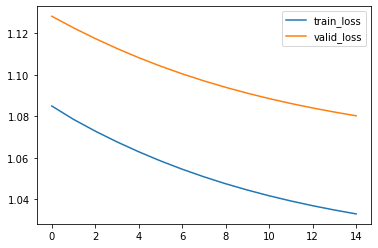

In [50]:
c660_model.train()

In [52]:
c660_model.test(e=0.02)

,R2,MSE,MAPE
Benzene Column C660 Split Factors Calculation_Split Factor for Individual Component to Benzene Column C660 Vent Gas_Hydrogen_Fraction,0,0.00110442,2.63578
Benzene Column C660 Split Factors Calculation_Split Factor for Individual Component to Benzene Column C660 Vent Gas_Methane_Fraction,0,0.0229581,NaN
Benzene Column C660 Split Factors Calculation_Split Factor for Individual Component to Benzene Column C660 Vent Gas_Ethane_Fraction,0,0.0039026,NaN
Benzene Column C660 Split Factors Calculation_Split Factor for Individual Component to Benzene Column C660 Vent Gas_Propane_Fraction,0,0.00194293,NaN
Benzene Column C660 Split Factors Calculation_Split Factor for Individual Component to Benzene Column C660 Vent Gas_n-Butane_Fraction,0,0.00193193,NaN
...,...,...,...
Density_Bottoms Production Rate and Composition,0,0.000880093,3.12518
Benzene Column C660 Operation_Yield Summary_Reflux Rate_m3/hr,0,9852.21,70.1761
Benzene Column C660 Operation_Column Temp Profile_C660 Tray 6 (SD & Control)_oC,0,2137.12,52.1903
Benzene Column C660 Operation_Column Temp Profile_C660 Tray 23 (Control)_oC,0,2592.64,54.8415


In [53]:
# save
joblib.dump(c660_model,'/content/drive/MyDrive/台塑輕油案子/data/c620/model/c660_real_data.pkl')

['/content/drive/MyDrive/台塑輕油案子/data/c620/model/c660_real_data.pkl']

# c670 模擬數據

In [54]:
# load data
import numpy as np
c670_df = pd.read_csv('/content/drive/MyDrive/台塑輕油案子/data/c620/cleaned/c670_train.csv',index_col=0)
c670_df_real = pd.read_excel('/content/drive/MyDrive/台塑輕油案子/data/c620/明志_遷移式學習_訓練資料_寄送版/c670_data.xlsx',index_col=0)
c = joblib.load('/content/drive/MyDrive/台塑輕油案子/data/c620/col_names/c670_col_names.pkl')

In [55]:
# 根據條件修改值
def change_value(df):
  a = df[c['upper_bf']]
  紫色零點零欄位 = a[a==0.0].dropna(axis=1).columns.tolist()
  紫色零點一欄位 = a[a==0.1].dropna(axis=1).columns.tolist()
  紫色零點九欄位 = a[a==0.9].dropna(axis=1).columns.tolist()
  紫色一點零欄位 = a[a==1.0].dropna(axis=1).columns.tolist()
  df.loc[:,紫色零點零欄位] = 0.0001 
  df.loc[:,紫色零點一欄位] = 0.0001 
  df.loc[:,紫色零點九欄位] = 0.9999
  df.loc[:,紫色一點零欄位] = 0.9999
  return df

In [56]:
c670_df = change_value(c670_df)

In [57]:
c670_df_real = change_value(c670_df_real)

In [59]:
x_col = c['combined'] + c['upper_bf']
op_col = c['density']+c['yRefluxRate']+c['yHeatDuty']+c['yControl']
op_col = c670_df_real[op_col].dropna(axis=1).columns.tolist()
sp_col = c['distillate_sf']+c['bottoms_sf']
n_idx = [[i,i+41] for i in range(41)]

  7%|▋         | 1/15 [00:00<00:03,  4.58it/s]

epoch:0 train_loss:7.6164 valid_loss:7.4918


100%|██████████| 15/15 [00:03<00:00,  4.46it/s]


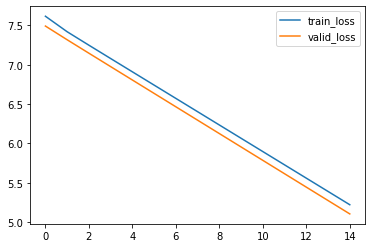

In [60]:
c670_model = autorch.utils.PartBulider(c670_df,x_col,sp_col+op_col,limit_y_range=False,normalize_idx_list=n_idx,max_epochs=max_epochs)
c670_model.net = nn.Linear(len(x_col),len(sp_col)+len(op_col))
c670_model.optimizer = Adam(c670_model.net.parameters())
c670_model.train()

In [61]:
c670_model.test(e=0.02)

,R2,MSE,MAPE
Toluene Column C670 Split Factors Calculation_Split Factor for Individual Component to Toluene Column C670 Distillate_Hydrogen_Fraction,0,4.07689e-06,0.145274
Toluene Column C670 Split Factors Calculation_Split Factor for Individual Component to Toluene Column C670 Distillate_Methane_Fraction,0,1.00951e-05,0.180352
Toluene Column C670 Split Factors Calculation_Split Factor for Individual Component to Toluene Column C670 Distillate_Ethane_Fraction,0,2.0694e-06,0.0802444
Toluene Column C670 Split Factors Calculation_Split Factor for Individual Component to Toluene Column C670 Distillate_Propane_Fraction,0,5.87852e-07,0.0375287
Toluene Column C670 Split Factors Calculation_Split Factor for Individual Component to Toluene Column C670 Distillate_n-Butane_Fraction,0,1.81999e-06,0.0675491
...,...,...,...
Density_Bottoms Production Rate and Composition,0,0.000112647,0.957068
Toluene Column C670 Operation_Yield \nSummary_Reflux Rate_m3/hr,0,36068.1,71.6651
Toluene Column C670 Operation_Column Temp Profile_C670 Tray 24 (Control)_oC,0,12084.2,59.7562
Toluene Column C670 Operation_Column Temp Profile_C670 Btm Temp (Control)_oC,0,23920.3,67.7106


# c670 遷移學習

In [62]:
pretrain_net = deepcopy(c670_model.net.train())
print(pretrain_net)

Linear(in_features=82, out_features=87, bias=True)


In [63]:
c670_model = autorch.utils.PartBulider(c670_df_real,x_col,sp_col+op_col,limit_y_range=False,normalize_idx_list=n_idx,max_epochs=max_epochs) # use real data  
c670_model.net = pretrain_net # use pretrain net
c670_model.optimizer = Adam(c670_model.net.parameters())

100%|██████████| 15/15 [00:00<00:00, 220.59it/s]


epoch:0 train_loss:5.7673 valid_loss:5.7869


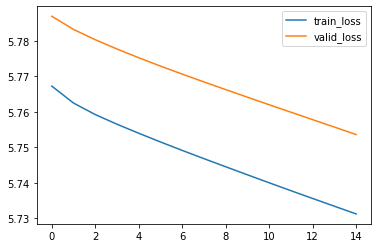

In [64]:
c670_model.train()

In [65]:
c670_model.test(e=0.02)

,R2,MSE,MAPE
Toluene Column C670 Split Factors Calculation_Split Factor for Individual Component to Toluene Column C670 Distillate_Hydrogen_Fraction,0,0.000179144,0.921008
Toluene Column C670 Split Factors Calculation_Split Factor for Individual Component to Toluene Column C670 Distillate_Methane_Fraction,0,0.00010217,0.546724
Toluene Column C670 Split Factors Calculation_Split Factor for Individual Component to Toluene Column C670 Distillate_Ethane_Fraction,0,0.0001126,0.785651
Toluene Column C670 Split Factors Calculation_Split Factor for Individual Component to Toluene Column C670 Distillate_Propane_Fraction,0,8.14521e-05,0.55458
Toluene Column C670 Split Factors Calculation_Split Factor for Individual Component to Toluene Column C670 Distillate_n-Butane_Fraction,0,4.55977e-05,0.338319
...,...,...,...
Density_Bottoms Production Rate and Composition,0,0.00235421,3.80067
Toluene Column C670 Operation_Yield \nSummary_Reflux Rate_m3/hr,0,42928,77.4534
Toluene Column C670 Operation_Column Temp Profile_C670 Tray 24 (Control)_oC,0,15027.6,67.0756
Toluene Column C670 Operation_Column Temp Profile_C670 Btm Temp (Control)_oC,0,27848,73.4179


In [66]:
joblib.dump(c670_model,'/content/drive/MyDrive/台塑輕油案子/data/c620/model/c670_real_data.pkl')

['/content/drive/MyDrive/台塑輕油案子/data/c620/model/c670_real_data.pkl']